In [1]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)

#### Covariance Matrix from $X \in \mathbb{R}^{d \times n}$

**1. Data shape**

* $X$: d rows (features), n columns (samples)

**2. Center the data**

* For each row (feature), subtract its mean
* $X_{\text{centered}} = X - \text{mean\_along\_rows}$

**3. Compute covariance matrix**

$$
C = \frac{1}{n} X_{\text{centered}} \cdot X_{\text{centered}}^T
$$

**4. Result**

* $C$ is $d \times d$
* Diagonal: variances
* Off-diagonal: covariances

Done ✅


In [30]:
# Step 1: Input data
x1 = np.array([10, 5, 2])
x2 = np.array([6, 2, 1])
x3 = np.array([2, 0, 0])

# Stack as columns (3 features x 3 samples)
X = np.column_stack([x1, x2, x3])
print("Original X (features x samples):")
print(X)

# Step 2: Compute mean of each row (i.e., each feature)
X_mean = np.mean(X, axis=1, keepdims=True)
print("\nMean of each feature:")
print(X_mean)

# Step 3: Center the data
X_centered = X - X_mean
print("\nCentered X:")
print(X_centered)

# Step 4: Covariance matrix
n = X.shape[1]  # number of samples
C = (1 / n) * X_centered @ X_centered.T
print("\nCovariance matrix C = (1/n) * X_centered * X_centered.T:")
print(C)

Original X (features x samples):
[[10  6  2]
 [ 5  2  0]
 [ 2  1  0]]

Mean of each feature:
[[6.    ]
 [2.3333]
 [1.    ]]

Centered X:
[[ 4.      0.     -4.    ]
 [ 2.6667 -0.3333 -2.3333]
 [ 1.      0.     -1.    ]]

Covariance matrix C = (1/n) * X_centered * X_centered.T:
[[10.6667  6.6667  2.6667]
 [ 6.6667  4.2222  1.6667]
 [ 2.6667  1.6667  0.6667]]


#### Traditional Statistics Formulas

**1. Variance** (for values $x_1, x_2, ..., x_n$)

$$
\text{Var}(x) = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2
$$

**2. Covariance** (for two variables $x$ and $y$)

$$
\text{Cov}(x, y) = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})
$$

**3. Interpretation:**

* Variance: spread of one variable
* Covariance: how two variables change together

Done ✅

In [31]:
# Step 1: Access individual features from X matrix
f1 = X[0]  # Feature 1 values across samples: [10, 6, 2]
f2 = X[1]  # Feature 2 values: [5, 2, 0]
f3 = X[2]  # Feature 3 values: [2, 1, 0]

# Step 2: Mean of each feature
m1, m2, m3 = np.mean(f1), np.mean(f2), np.mean(f3)

# Step 3: Variances
var1 = np.mean((f1 - m1)**2)
var2 = np.mean((f2 - m2)**2)
var3 = np.mean((f3 - m3)**2)

print("Variances:")
print(f"Var(f1): {var1:.4f}")
print(f"Var(f2): {var2:.4f}")
print(f"Var(f3): {var3:.4f}")

# Step 4: Covariances
cov12 = np.mean((f1 - m1)*(f2 - m2))
cov13 = np.mean((f1 - m1)*(f3 - m3))
cov23 = np.mean((f2 - m2)*(f3 - m3))

print("\nCovariances:")
print(f"Cov(f1, f2): {cov12:.4f}")
print(f"Cov(f1, f3): {cov13:.4f}")
print(f"Cov(f2, f3): {cov23:.4f}")

# Step 5: Form covariance matrix manually
C_manual = np.array([
    [var1, cov12, cov13],
    [cov12, var2, cov23],
    [cov13, cov23, var3]
])

print("\nManual covariance matrix:\n", C_manual)

Variances:
Var(f1): 10.6667
Var(f2): 4.2222
Var(f3): 0.6667

Covariances:
Cov(f1, f2): 6.6667
Cov(f1, f3): 2.6667
Cov(f2, f3): 1.6667

Manual covariance matrix:
 [[10.6667  6.6667  2.6667]
 [ 6.6667  4.2222  1.6667]
 [ 2.6667  1.6667  0.6667]]


In [32]:
np.allclose(C, C_manual)

True

#### Given covariance matrix $C$:

$$
\begin{bmatrix}
10.6667 & 6.6667 & 2.6667 \\
6.6667 & 4.2222 & 1.6667 \\
2.6667 & 1.6667 & 0.6667
\end{bmatrix}
$$

1. Find eigenvalues $\lambda$ by solving $\det(C - \lambda I) = 0$ (cubic polynomial).

2. For each $\lambda$, solve $(C - \lambda I)v = 0$ for eigenvector $v$.

*This is tedious by hand; better done numerically or with software.*

In [44]:
eigenvalues, eigenvectors = np.linalg.eig(C)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors.T[sorted_indices]

print("Eigenvalues (sorted):")
print(eigenvalues)
print("\nEigenvectors (sorted):")
print(eigenvectors)

print("\nMax eigenvalue:")
print(eigenvalues[0])
print("\nCorresponding eigenvector:")
print(eigenvectors[0])
# NumPy's `eig` returns normalized eigenvectors by default.

Eigenvalues (sorted):
[15.515   0.0406 -0.    ]

Eigenvectors (sorted):
[[-0.8288 -0.5198 -0.2072]
 [-0.5043  0.8543 -0.1261]
 [-0.2425  0.      0.9701]]

Max eigenvalue:
15.514973492690514

Corresponding eigenvector:
[-0.8288 -0.5198 -0.2072]


# === Using first 1 principal components ===

In [48]:
w = eigenvectors[0]
print("\nPrincipal eigenvector (w):")
print(w)

# Project the data onto the principal eigenvector
projected_values = np.dot(w.T, X_centered)  # result: 1D array of projected values
print("\nProjected values onto principal eigenvector:")
print(projected_values)


Principal eigenvector (w):
[-0.8288 -0.5198 -0.2072]

Projected values onto principal eigenvector:
[-4.9085  0.1733  4.7352]


In [51]:
X_reconstructed = np.outer(w, projected_values) + X_mean  # Add mean back
X_reconstructed
X

loss_pc1 = np.linalg.norm(X - X_reconstructed, ord='fro')
print("Reconstruction error using 1 PC:", loss_pc1)

array([[10.0679,  5.8564,  2.0757],
       [ 4.8849,  2.2433, -0.1282],
       [ 2.017 ,  0.9641,  0.0189]])

array([[10,  6,  2],
       [ 5,  2,  0],
       [ 2,  1,  0]])

Reconstruction error using 1 PC: 0.3489214647955721


# === Using first 2 principal components ===

In [59]:
W = eigenvectors[:2]
W.shape
X_centered.shape

(2, 3)

(3, 3)

In [62]:
# Project onto 2D
projected_values = W @ X_centered

projected_values
projected_values.shape

array([[-4.9085,  0.1733,  4.7352],
       [ 0.1347, -0.2848,  0.1501]])

(2, 3)

In [65]:
# Reconstruct
X_reconstructed = W.T @ projected_values + X_mean

X_reconstructed
X_reconstructed.shape

X
X.shape

# Loss with 2 PCs
loss_pc2 = np.linalg.norm(X - X_reconstructed, ord='fro')
print("Reconstruction error using 2 PCs:", loss_pc2)

array([[10.,  6.,  2.],
       [ 5.,  2.,  0.],
       [ 2.,  1., -0.]])

(3, 3)

array([[10,  6,  2],
       [ 5,  2,  0],
       [ 2,  1,  0]])

(3, 3)

Reconstruction error using 2 PCs: 4.2711132545550575e-15


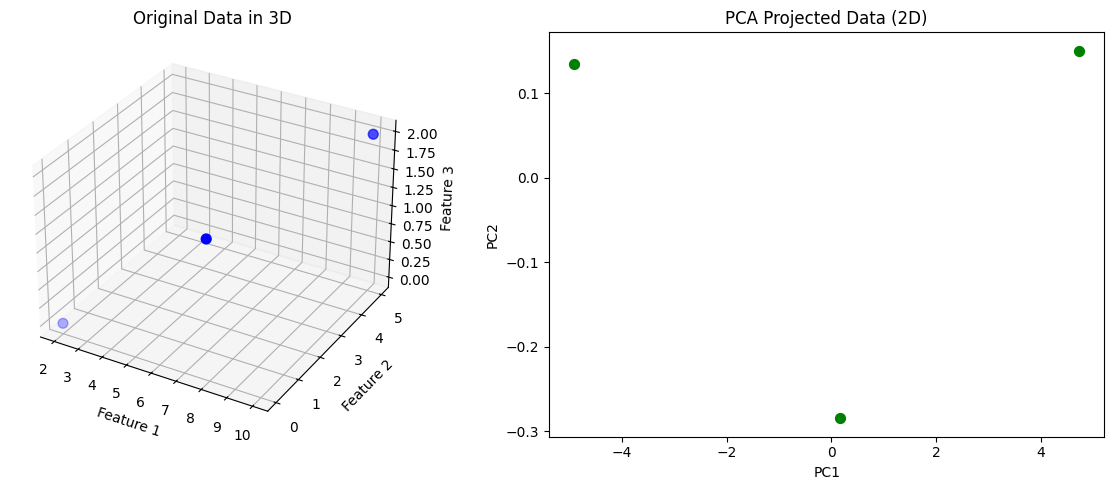

In [67]:
def plot_pca_projection(X, projected_values):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D

  fig = plt.figure(figsize=(12, 5))

  # 3D plot of original data
  ax = fig.add_subplot(1, 2, 1, projection='3d')
  ax.scatter(X[0], X[1], X[2], color='blue', s=50)
  ax.set_title("Original Data in 3D")
  ax.set_xlabel("Feature 1")
  ax.set_ylabel("Feature 2")
  ax.set_zlabel("Feature 3")

  # 2D plot after PCA projection
  ax2 = fig.add_subplot(1, 2, 2)
  ax2.scatter(projected_values[0], projected_values[1], color='green', s=50)
  ax2.set_title("PCA Projected Data (2D)")
  ax2.set_xlabel("PC1")
  ax2.set_ylabel("PC2")

  plt.tight_layout()
  plt.show()


plot_pca_projection(X, projected_values)